## Libraries

In [1]:
# Set the graphs as interactive.
%matplotlib inline
# Import necessary libraries for initial analysis
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as color

from scipy import stats
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


# Pre-processing numerical features 

In [2]:
cookies = pd.read_csv("../data/cookies.csv")
cookies_validate =  pd.read_csv("../data/cookies_validate.csv")

In [3]:
test = cookies[cookies.select_dtypes(['int64','float64']).ge(0).all(1)]

In [4]:
cookies.isna().sum().sum()

17

In [5]:
test.shape

(5177, 16)

In [6]:
test.isna().sum()

sugar to flour ratio    0
sugar index             0
bake temp               0
chill time              0
calories                0
density                 0
pH                      0
grams baking soda       0
bake time               0
quality                 0
butter type             0
weight                  0
diameter                0
mixins                  2
crunch factor           0
aesthetic appeal        0
dtype: int64

In [7]:
cookies.shape

(5198, 16)

In [8]:
cookies[cookies["sugar index"] == 3.0].count()

sugar to flour ratio    36
sugar index             36
bake temp               36
chill time              36
calories                36
density                 36
pH                      36
grams baking soda       36
bake time               36
quality                 36
butter type             36
weight                  36
diameter                36
mixins                  36
crunch factor           36
aesthetic appeal        36
dtype: int64

In [9]:
cookies["sugar index"].median()

3.0

In [10]:
cookies.isna().sum()

sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
butter type              0
weight                   0
diameter                 0
mixins                   2
crunch factor            0
aesthetic appeal         0
dtype: int64

In [11]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


In [12]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  diameter              5198 non-null   int64  
 13  mixins                5196 non-null   object 
 14  crunch factor         5198 non-null   float64
 15  aesthetic appeal     

In [13]:
cookies.describe()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,diameter,crunch factor,aesthetic appeal
count,5198.000000,5193.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5188.000000,5198.000000,5198.000000,5198.0,5198.000000,5198.000000
mean,0.318049,5.402465,559.638322,30.390246,115.015294,0.995819,8.222020,0.530864,10.494758,7.325125,14.381935,7.0,1.499367,3.000577
std,0.150036,4.668342,353.274062,17.268403,56.506171,0.062193,0.283323,0.150886,1.194584,1.302780,3.023740,0.0,0.289205,0.024019
min,0.000000,0.600000,90.000000,0.000000,-99.000000,0.987110,7.720000,0.220000,8.000000,3.000000,-99.000000,7.0,1.000000,3.000000
25%,0.240000,1.800000,380.000000,17.000000,76.000000,0.992300,8.110000,0.430000,9.500000,7.000000,12.800000,7.0,1.250000,3.000000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.505000,10.300000,8.000000,14.000000,7.0,1.500000,3.000000
75%,0.390000,8.000000,640.000000,41.000000,155.000000,0.996908,8.320000,0.600000,11.300000,8.000000,15.400000,7.0,1.750000,3.000000
max,3.000000,31.600000,6110.000000,146.500000,366.500000,5.000000,25.000000,2.000000,14.900000,11.000000,31.800000,7.0,2.000000,4.000000


In [14]:
cookies[cookies.isnull()]

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
cookies.isnull().sum()

sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
butter type              0
weight                   0
diameter                 0
mixins                   2
crunch factor            0
aesthetic appeal         0
dtype: int64

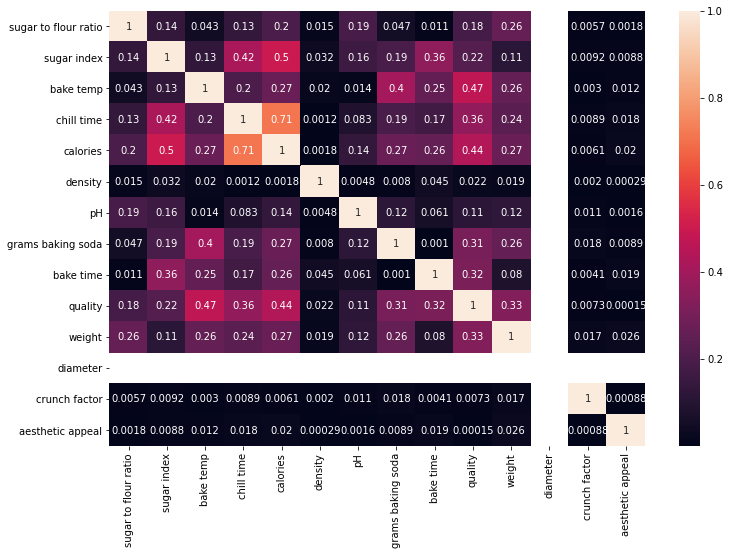

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

corrMatrix = cookies.corr().abs()
sns.heatmap(corrMatrix, annot=True)
plt.show()

**Eliminate the NaN and diameter cause doesn't make sense one column with every value with 7 (there's no corr)**

In [17]:
cookies = cookies.dropna()
cookies = cookies.drop(columns = 'diameter',axis=1)
cookies.isnull().sum()

sugar to flour ratio    0
sugar index             0
bake temp               0
chill time              0
calories                0
density                 0
pH                      0
grams baking soda       0
bake time               0
quality                 0
butter type             0
weight                  0
mixins                  0
crunch factor           0
aesthetic appeal        0
dtype: int64

**Let's see the values for string columns values and then drop de outliers with numerical values columns**

In [18]:
cookies['butter type'].unique() #For One Hot
cookies['mixins'].unique()

array(['raisins', 'nuts, chocolate', 'chocolate', 'nuts, oats, chocolate',
       'chocolate, oats', 'raisins, oats', 'nuts,raisins', 'nuts, oats',
       'chocolate, peanut butter', 'chocolate, oats, peanut butter',
       'peanut butter', 'peanut butter, raisins', 'oats'], dtype=object)

In [19]:
# we observe that mixins there's a not space applied in 'nuts,raisins', then we replace with space
cookies["mixins"] = cookies["mixins"].str.replace("nuts,raisins", "nuts, raisins")

In [20]:
z = np.abs(stats.zscore(cookies.select_dtypes(['int64', 'float64'])))
cookies = cookies[(z < 3).all(axis=1)]
cookies_float = cookies.select_dtypes(['int64', 'float64'])

**Seeking the linear regresion. If the line is flat, we eliminate them cause doesn't mean any relation significant variable**

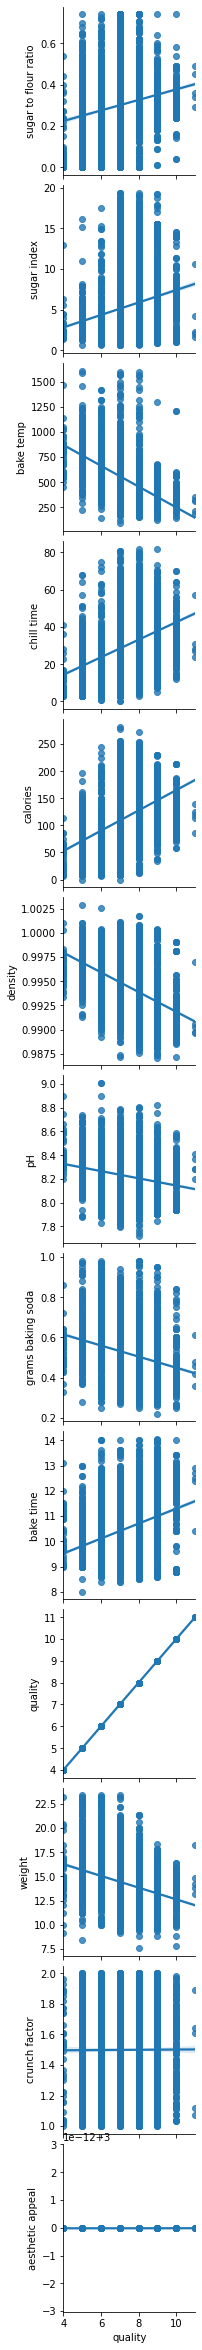

In [21]:
sns.pairplot(data = cookies_float, y_vars = cookies_float.columns,x_vars = 'quality' ,kind = 'reg' )

In [22]:
cookies = cookies.drop(columns='aesthetic appeal')

# Pre-processing categorical features

### One Hot Encoding

In [23]:
cookies = pd.concat([cookies,pd.get_dummies(cookies['butter type'], prefix='butter type')],axis=1)
cookies.drop(['butter type'],axis=1, inplace=True)

In [24]:
cookies.head(2)

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,mixins,crunch factor,butter type_cubed,butter type_melted
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,15.2,raisins,1.30,0,1
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,12.4,raisins,1.71,0,1


### Ordinal Encoding

In [25]:
cookies['mixins']= cookies['mixins'].astype('category')
cookies['mixins'] = cookies['mixins'].cat.codes

In [26]:
cookies.head(2)

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,mixins,crunch factor,butter type_cubed,butter type_melted
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,15.2,10,1.30,0,1
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,12.4,10,1.71,0,1


In [27]:
# define X and y (features and target)
X = cookies.drop(columns="quality")
y = cookies["quality"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initiate transformer

X_train_scaled = scaler.fit_transform(X_train) # scale data
X_test_scaled = scaler.transform(X_test) # scale test set

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
reg.score(X_train_scaled, y_train)

0.6653149412033978

In [31]:
prediction = reg.predict(X_test_scaled)

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, prediction)

0.6836383115515484

In [33]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, prediction, squared=False)

0.7390505649946055

### KNN

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import randint
import time

In [35]:
start_time = time.time()
neigh = KNeighborsRegressor()

best_knn = GridSearchCV(estimator=neigh,
                            param_grid={"n_neighbors":[13],
                            "weights":["distance"],
                            "algorithm":["brute"],
                            "leaf_size":[57],
                            "p":[1]},
                            scoring="neg_mean_squared_error",
                            cv=50)

best_knn.fit(X_train_scaled, y_train)

print("--- %s seconds ---" % (time.time() - start_time))
print(round(best_knn.best_score_, 2))

--- 0.4931914806365967 seconds ---
-0.45


In [36]:
best_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=50, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['brute'], 'leaf_size': [57],
                         'n_neighbors': [13], 'p': [1],
                         'weights': ['distance']},
             scoring='neg_mean_squared_error')

In [37]:
predictions_knn = best_knn.predict(X_test_scaled)

In [38]:
mean_squared_error(y_test, predictions_knn, squared=False)

0.6826757279302221

### RandomForest

In [39]:
from sklearn.ensemble import RandomForestRegressor

start_time = time.time()
RF = RandomForestRegressor()

best_RF = GridSearchCV(estimator=RF,
                          param_grid={"max_features":["log2"],
                                      "criterion":["mse"]},
                          scoring="neg_mean_squared_error",
                          cv=50)

best_RF.fit(X_train_scaled, y_train)

print("--- %s seconds ---" % (time.time() - start_time))
print(round(best_RF.best_score_, 2))

--- 29.867619276046753 seconds ---
-0.38


In [40]:
best_RF.fit(X_train_scaled, y_train)

GridSearchCV(cv=50, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_features': ['log2']},
             scoring='neg_mean_squared_error')

In [41]:
predictions_rf = best_RF.predict(X_test_scaled)

In [42]:
mean_squared_error(y_test, predictions_rf, squared=False)

0.6355157151959016

### GradientBoost

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

start_time = time.time()
grad = GradientBoostingRegressor()

best_gradientBoost = GridSearchCV(estimator=grad,
                                    param_grid={"max_features":["auto"],
                                                "criterion":["friedman_mse"],
                                                "loss":["ls"]},
                                    scoring="neg_mean_squared_error",
                                    cv=50)

best_gradientBoost.fit(X_train_scaled, y_train)

print("--- %s seconds ---" % (time.time() - start_time))
print(round(best_gradientBoost.best_score_, 2))

--- 28.738298892974854 seconds ---
-0.45


In [44]:
best_gradientBoost.fit(X_train_scaled, y_train)

GridSearchCV(cv=50, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse'], 'loss': ['ls'],
                         'max_features': ['auto']},
             scoring='neg_mean_squared_error')

In [45]:
predictions_grad = best_gradientBoost.predict(X_test_scaled)

In [46]:
mean_squared_error(y_test, predictions_grad, squared=False)

0.6934377869076858

### DecisionTree

In [47]:
from sklearn.tree import DecisionTreeRegressor

start_time = time.time()
tree = DecisionTreeRegressor()

tree_params = {"criterion":["mse", "friedman_mse", "mae"],
              "splitter":["best", "random"],
              "max_features":["auto", "sqrt", "log2"],
              "max_depth":randint(low=3, high=13),
              "max_leaf_nodes":randint(low=3, high=35)}

tree_search = RandomizedSearchCV(tree,
                                tree_params,
                                scoring="r2",
                                cv=10,
                                n_jobs=4,
                                random_state=8)

tree_search.fit(X_train_scaled, y_train)


print("--- %s seconds ---" % (time.time() - start_time))
print(round(tree_search.best_score_, 2))
print(tree_search.best_params_)

--- 2.106445074081421 seconds ---
0.68
{'criterion': 'mse', 'max_depth': 6, 'max_features': 'auto', 'max_leaf_nodes': 34, 'splitter': 'best'}


In [48]:
tree_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=4,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E8C777B7F0>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E8C777BC10>,
                                        'splitter': ['best', 'random']},
                   random_state=8, scoring='r2')

In [49]:
predictions_tree = tree_search.predict(X_test_scaled)

In [50]:
mean_squared_error(y_test, predictions_tree, squared=False)

0.719681703871948

**PCA**

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None) # pick number of components
X_reduced = pca.fit_transform(X_train_scaled)

In [52]:
X_reduced.shape

(3922, 14)

In [53]:
pca.explained_variance_ratio_

array([3.25384507e-01, 1.84320884e-01, 1.03162121e-01, 7.32922332e-02,
       6.90426969e-02, 6.33768462e-02, 4.27437765e-02, 4.03501654e-02,
       3.73399672e-02, 2.75620537e-02, 2.01985356e-02, 1.18842882e-02,
       1.34192508e-03, 1.00048251e-33])

In [54]:
def cumulative_sum(variance_ratio):
    cumulativeSum = []
    j = 0
    
    for i in variance_ratio:
        j += i
        cumulativeSum.append(j)
        
    return cumulativeSum

In [55]:
cumulative_variance = cumulative_sum(pca.explained_variance_ratio_)

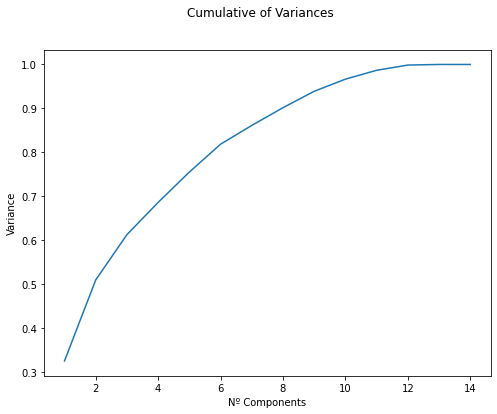

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(8,6))

fig.suptitle("Cumulative of Variances")

ax.plot(range(1,15), cumulative_variance)

ax.set_ylabel("Variance")
ax.set_xlabel("Nº Components")

plt.show()

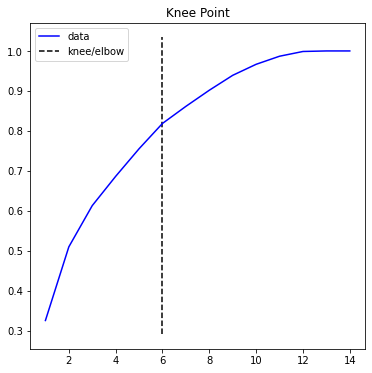

In [57]:
from kneed import KneeLocator

kneedle = KneeLocator(range(1,15), cumulative_variance)

kneedle.plot_knee()

In [58]:
pca2 = PCA(n_components=2) # pick number of components
X_reduced2 = pca.fit_transform(X_train_scaled)

In [59]:
start_time = time.time()
neigh_PCA = KNeighborsRegressor()

param_distribs = {"n_neighbors":randint(low=3, high=20),
                 "weights":["distance", "uniform"],
                 "p":[1, 2],
                 "algorith":["auto", "ball_tree", "kd_tree", "brute"]}

neigh_reduced_search = RandomizedSearchCV(neigh_PCA,
                                   param_distribs,
                                   scoring="neg_mean_squared_error",
                                   cv=5,
                                   n_jobs=4,
                                   random_state=8)


neigh_reduced_search.fit(X_reduced2, y_train)

print("--- %s seconds ---" % (time.time() - start_time))
print(round(neigh_reduced_search.best_score_, 2))
print(neigh_reduced_search.best_params_)

ValueError: Invalid parameter algorith for estimator KNeighborsRegressor(). Check the list of available parameters with `estimator.get_params().keys()`.